<!-- https://www.kaggle.com/code/iakhtar0/63-next-word-predictor-lstm-campusx -->

In [1]:
%matplotlib inline

In [2]:
import sys
import platform
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import nltk
import sklearn

print("🔧 Environment Information")
print("=" * 40)
print(f"Python version      : {platform.python_version()}")
print(f"TensorFlow version  : {tf.__version__}")
print(f"NumPy version       : {np.__version__}")
print(f"Pandas version      : {pd.__version__}")
print(f"Matplotlib version  : {matplotlib.__version__}")
print(f"Seaborn version     : {sns.__version__}")
print(f"NLTK version        : {nltk.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print("=" * 40)

# Optional: GPU info
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0].name}")
else:
    print("⚠️ No GPU detected (running on CPU).")


🔧 Environment Information
Python version      : 3.10.18
TensorFlow version  : 2.10.1
NumPy version       : 1.25.2
Pandas version      : 2.1.4
Matplotlib version  : 3.10.3
Seaborn version     : 0.13.2
NLTK version        : 3.9.2
scikit-learn version: 1.7.2
✅ GPU detected: /physical_device:GPU:0


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SriRam.A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Deep Learning library
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D
from tensorflow.keras import backend as K
print(tf.__version__)

2.10.1


In [5]:
from pathlib import Path
NOTEBOOK_DIR  = Path().resolve()
BASE_DIR = NOTEBOOK_DIR.parents[1]
DATASET_DIR = BASE_DIR /  "data" / 'TwitterSentimentAnalysisDataset' / "preprocessed"
DATASET_FILE_PATH = DATASET_DIR  / 'twitter_training.csv'
DATASET_FILE_PATH.exists()

True

In [6]:
df = pd.read_csv(DATASET_FILE_PATH,usecols=["sentiment","cleaned_text"])
df["cleaned_text"] = df["cleaned_text"].astype(str)
df.isnull().sum()

sentiment       0
cleaned_text    0
dtype: int64

Max words in a sentence: 198
Average words in a sentence: 19.251302345661248


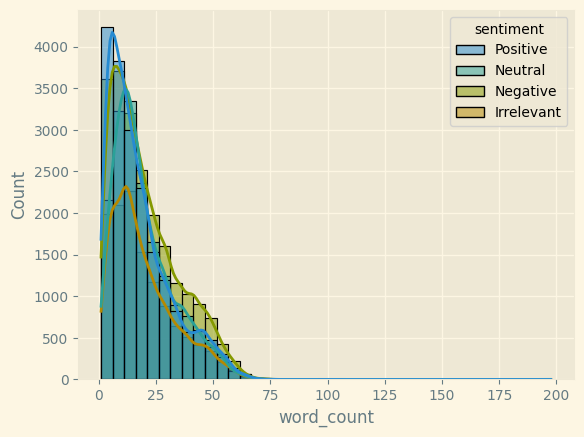

In [7]:
import matplotlib.pyplot as plt
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))
max_words = df["word_count"].max()
avg_words = df["word_count"].mean()
print("Max words in a sentence:", max_words)
print("Average words in a sentence:", avg_words)
plt.style.use('Solarize_Light2')
# sns.set_theme(style="dark")
sns.histplot(data=df,x = 'word_count',hue='sentiment',binwidth=5,kde=True)
plt.show()

In [8]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [9]:
tokenizer = Tokenizer(oov_token="None")
# Gives ID to each word in the sentences (entire column)
tokenizer.fit_on_texts(df['cleaned_text'])
vocab_size  = len(tokenizer.word_index) # 31774 unique words
print("Total unique words : ", vocab_size )
print("Unique words with indices",tokenizer.word_index)

Total unique words :  31774
Unique words with indices {'None': 1, 'the': 2, 'i': 3, 'to': 4, 'and': 5, 'a': 6, 'is': 7, 'of': 8, 'it': 9, 'for': 10, 'you': 11, 'in': 12, 'not': 13, 'thi': 14, 'on': 15, 'my': 16, 'game': 17, 'that': 18, 'have': 19, 'with': 20, 'are': 21, 'so': 22, 'be': 23, 'me': 24, 'play': 25, 'am': 26, 'do': 27, 'just': 28, 'all': 29, 'can': 30, 'but': 31, 'get': 32, 'wa': 33, 'like': 34, 'at': 35, 'will': 36, 'go': 37, 'out': 38, 'we': 39, 'from': 40, 'your': 41, 'now': 42, 'fuck': 43, 'they': 44, '2': 45, 'as': 46, 'love': 47, 'one': 48, 'if': 49, 'ha': 50, 'about': 51, 'good': 52, 'what': 53, 'no': 54, 'realli': 55, 'an': 56, 'when': 57, 'new': 58, 'time': 59, 'up': 60, 'see': 61, 'more': 62, 'by': 63, 'how': 64, 'look': 65, 'make': 66, 'peopl': 67, 'johnson': 68, 'or': 69, 'thank': 70, 'whi': 71, 'shit': 72, 'becaus': 73, 'some': 74, '3': 75, 'been': 76, 'got': 77, 'best': 78, 'still': 79, 'want': 80, 'player': 81, 'even': 82, 'would': 83, 'year': 84, 'day': 85, 

In [10]:
sequences  = tokenizer.texts_to_sequences(df['cleaned_text'])
print("Total Sequences",len(sequences) )# = total rows
print("Length of 1st sequence",len(sequences[0])) # = 1st row word count
sequences[:4]

Total Sequences 69490
Length of 1st sequence 12


[[3, 26, 116, 4, 2, 1863, 5, 3, 36, 194, 11, 29],
 [3, 26, 32, 15, 158, 5, 3, 36, 194, 11, 29],
 [3, 26, 116, 15, 158, 5, 3, 36, 1279, 11, 29],
 [3, 26, 32, 15, 158, 45, 5, 3, 36, 1279, 11, 24, 29]]

In [11]:
df.head(5)

,sentiment,cleaned_text,word_count
0,Positive,i am come to the border and i will kill you all,12
1,Positive,i am get on borderland and i will kill you all,11
2,Positive,i am come on borderland and i will murder you all,11
3,Positive,i am get on borderland 2 and i will murder you...,13
4,Positive,i am get into borderland and i can murder you all,11


In [12]:
maxlen = 75
padded_sentence_sequences = pad_sequences(sequences, maxlen = maxlen, padding='pre')
print("Padded Sequence shape :",padded_sentence_sequences.shape)
padded_sentence_sequences

Padded Sequence shape : (69490, 75)


array([[   0,    0,    0, ...,  194,   11,   29],
       [   0,    0,    0, ...,  194,   11,   29],
       [   0,    0,    0, ..., 1279,   11,   29],
       ...,
       [   0,    0,    0, ...,  111,   13,  962],
       [   0,    0,    0, ..., 1743,  173,  962],
       [   0,    0,    0, ...,  111,   13,  962]])

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])
y = to_categorical(y_encoded)  # one-hot encode for multi-class

In [14]:
y_encoded

array([3, 3, 3, ..., 3, 3, 3])

In [15]:
y.shape

(69490, 4)

In [16]:
y

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import SimpleRNN , Dense , Embedding, LSTM, GRU 
import mlflow
import mlflow.tensorflow
import warnings
warnings.filterwarnings("ignore")

c:\Users\SriRam.A\miniconda3\envs\tensorflow-miniconda\lib\site-packages\mlflow\utils\requirements_utils.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # noqa: TID251
c:\Users\SriRam.A\miniconda3\envs\tensorflow-miniconda\lib\site-packages\pydantic\_internal\_config.py:383: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [18]:
BASE_DIR

WindowsPath('C:/Users/SriRam.A/Documents/sr_proj/CivicSense')

In [19]:
tracking_path = f"file:///{BASE_DIR.as_posix()}/mlruns"
mlflow.set_tracking_uri(tracking_path)
print("Tracking URI:", mlflow.get_tracking_uri())


Tracking URI: file:///C:/Users/SriRam.A/Documents/sr_proj/CivicSense/mlruns


In [20]:
mlflow.set_experiment("1-RNN")

2025/11/13 19:43:32 INFO mlflow.tracking.fluent: Experiment with name '1-RNN' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/SriRam.A/Documents/sr_proj/CivicSense/mlruns/908303761318665255', creation_time=1763043212205, experiment_id='908303761318665255', last_update_time=1763043212205, lifecycle_stage='active', name='1-RNN', tags={}>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sentence_sequences, y, test_size=0.4, random_state=42)

In [ ]:
# Define constants
timestep = maxlen
input_nodes = 1
num_classes = y.shape[1]
# ---- Start MLflow Run manually ----
run =  mlflow.start_run(run_name="post_padding")
# Log preprocessing details
mlflow.log_param("preprocess", "post_padding")
mlflow.log_param("timesteps", timestep)
mlflow.log_param("tokenizer", "Keras Tokenizer")
# ---- Define and compile model ----
model = Sequential()
model.add(SimpleRNN(32, input_shape=(timestep, input_nodes),return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()
mlflow.tensorflow.autolog()
# ---- Train ----


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
Total params: 1,220
Trainable params: 1,220
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1,
    batch_size=128,
)

1/1 [==============================] - 0s 150ms/step
INFO:tensorflow:Assets written to: C:\Users\SriRam.A\AppData\Local\Temp\tmpjpa67vnx\model\data\model\assets


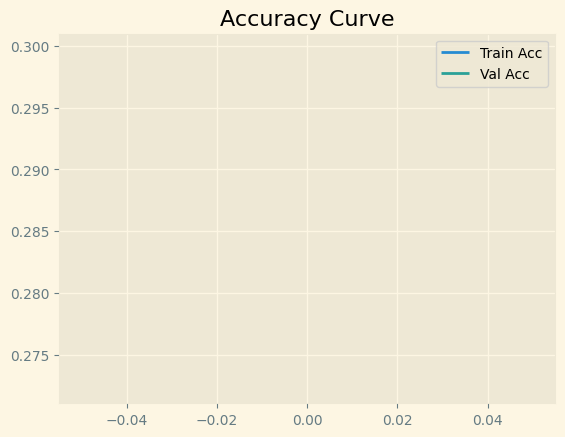

In [24]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
mlflow.log_figure(plt.gcf(), "accuracy_curve.png")
plt.show()

In [ ]:
# loss, accuracy = model.evaluate(X_val,y_val)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")

869/869 [==============================] - 13s 15ms/step - loss: 0.5538 - accuracy: 0.3084
Test Loss: 0.5537537932395935
Test Accuracy: 0.3084256649017334


In [25]:
from mlflow.types import Schema, TensorSpec
from mlflow.models import ModelSignature
import numpy as np
input_schema = Schema([
    TensorSpec(np.dtype(np.float32), (-1, timestep, input_nodes), "input")
])
output_schema = Schema([
    TensorSpec(np.dtype(np.float32), (-1, num_classes), "output")
])
signature = ModelSignature(inputs=input_schema, outputs=output_schema)

In [26]:
# ---- Log Model ----
mlflow.tensorflow.log_model(model, "model",signature=signature)

INFO:tensorflow:Assets written to: C:\Users\SriRam.A\AppData\Local\Temp\tmpilb29oan\model\data\model\assets


869/869 [==============================] - 9s 10ms/step


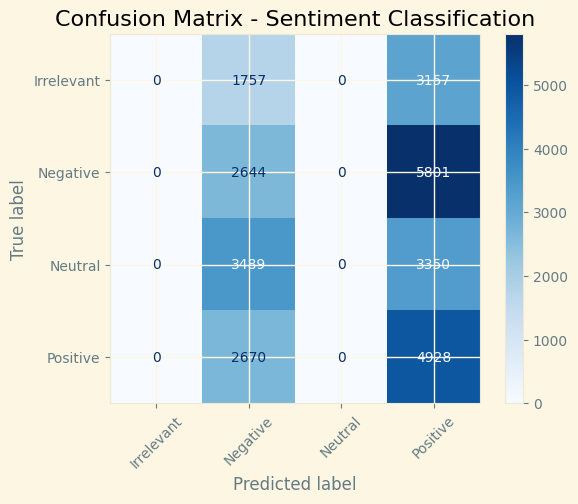


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00      4914
    Negative       0.25      0.31      0.28      8445
     Neutral       0.00      0.00      0.00      6839
    Positive       0.29      0.65      0.40      7598

    accuracy                           0.27     27796
   macro avg       0.13      0.24      0.17     27796
weighted avg       0.15      0.27      0.19     27796



<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1️⃣ Make predictions on the validation (test) data
y_pred = model.predict(X_val)

# 2️⃣ Convert probabilities → class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# 3️⃣ Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 4️⃣ Display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Sentiment Classification")
plt.show()
mlflow.log_figure(plt.gcf(), "confusion_matrix.png")
# 5️⃣ Optional: detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


In [28]:
mlflow.end_run()

In [29]:
active_run = mlflow.active_run()
if active_run:
    print("✅ Active Run:")
    print(f"Run ID: {active_run.info.run_id}")
    print(f"Run Name: {active_run.data.tags.get('mlflow.runName', 'Unnamed')}")
else:
    print("❌ No active run.")

❌ No active run.
